In [1]:
import json
import pandas as pd
import urllib.parse

In [3]:
f = open('url_500_11.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
f.close()

In [4]:
df_json=pd.DataFrame(data).T

In [10]:
df_json.head(5)


,robots,all_links,xml_filter,news_filter,index_filter
https://news.yahoo.com,User-agent: *\nDisallow: /caas/\nDisallow: /_t...,[https://news.yahoo.com/sitemaps/news-sitemap_...,[https://news.yahoo.com/sitemaps/news-sitemap_...,[https://news.yahoo.com/sitemaps/news-sitemap_...,[https://news.yahoo.com/sitemaps/news-sitemap_...
https://www.dailymail.co.uk,# Robots.txt for https://www.dailymail.co.uk/ ...,"[https://www.dailymail.co.uk/, https://www.dai...",[https://www.dailymail.co.uk/google-news-sitem...,[https://www.dailymail.co.uk/google-news-sitem...,None
https://www.globalsecurity.org,None,None,None,None,None
https://timesofindia.indiatimes.com,Sitemap: https://timesofindia.indiatimes.com/s...,[https://timesofindia.indiatimes.com/sitemap/t...,[https://timesofindia.indiatimes.com/sitemap/t...,None,[https://timesofindia.indiatimes.com/staticsit...
https://menafn.com,#\r\n# robots.txt\r\n#\r\n# This file is to pr...,"[http://example.com/robots.txt, http://example...","[http://example.com/site/robots.txt, https://m...",[https://menafn.com/updates/sitemap_news_en.xm...,"[https://menafn.com/updates/sitemap_index.xml,..."


In [14]:
url_news=df_json.loc[:, "news_filter"].dropna()
url_news

https://news.yahoo.com            [https://news.yahoo.com/sitemaps/news-sitemap_...
https://www.dailymail.co.uk       [https://www.dailymail.co.uk/google-news-sitem...
https://menafn.com                [https://menafn.com/updates/sitemap_news_en.xm...
https://www.hindustantimes.com    [https://www.hindustantimes.com/sitemap/news.xml]
https://www.theepochtimes.com     [https://www.theepochtimes.com/sitemap/sitemap...
                                                        ...                        
https://www.highsnobiety.com            [https://highsnobiety.com/sitemap-news.xml]
https://www.droid-life.com            [https://www.droid-life.com/news-sitemap.xml]
https://raillynews.com                   [https://raillynews.com/sitemap_index.xml]
https://www.themercury.com.au      [https://www.themercury.com.au/news-sitemap.xml]
https://pcr-online.biz                    [https://pcr-online.biz/sitemap-news.xml]
Name: news_filter, Length: 1355, dtype: object

In [24]:
list_list_path=url_news.apply(lambda liste_url: [urllib.parse.urlparse(k).path for k in  liste_url ])

paths=pd.Series([ url for list_url in list_list_path for url in list_url ]).value_counts()
paths.iloc[:15]

/tncms/sitemap/editorial.xml                            1446
/news-sitemap.xml                                        253
/sitemap.xml                                             239
/sitemap-news.xml                                        176
/news-sitemap-content.xml                                116
/sitemap_index.xml                                       107
/arc/outboundfeeds/news-sitemap-index/category/news/      96
/sitemap_news.xml                                         53
/sitemaps/googlenews                                      31
/arc/outboundfeeds/sitemap-news/                          25
/google-news-sitemap.xml                                  24
/arc/outboundfeeds/news-sitemap-index                     23
/arc/outboundfeeds/sitemap-index/                         22
/wp-sitemap.xml                                           21
/sitemap-google-news.xml                                  20
Name: count, dtype: int64

In [19]:
urllib.parse.urlparse("https://pcr-online.biz/sitemap-news.xml").path

'/sitemap-news.xml'

<AxesSubplot:ylabel='Frequency'>

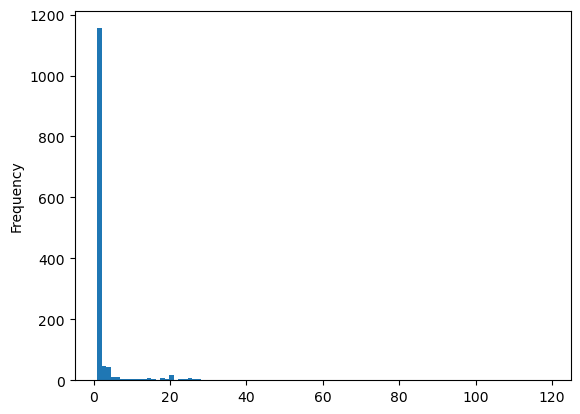

In [32]:
url_news.apply(lambda liste_url: len(liste_url)).sort_values().plot.hist(stacked=True, bins=100)

In [7]:
list(df_json.index)

['https://news.yahoo.com',
 'https://www.dailymail.co.uk',
 'https://www.globalsecurity.org',
 'https://timesofindia.indiatimes.com',
 'https://menafn.com',
 'https://www.hindustantimes.com',
 'https://www.elwakt.com',
 'https://www.theepochtimes.com',
 'https://www.jpost.com',
 'https://www.marketscreener.com',
 'https://www.theguardian.com',
 'https://allafrica.com',
 'https://nypost.com',
 'https://www.firstpost.com',
 'https://www.thehindu.com',
 'https://www.foxnews.com',
 'https://www.miragenews.com',
 'https://www.breitbart.com:443',
 'https://www.thenews.com.pk',
 'https://indianexpress.com',
 'https://www.nytimes.com',
 'https://www.bignewsnetwork.com',
 'https://reliefweb.int',
 'https://www.streetinsider.com',
 'https://www.dawn.com',
 'https://punchng.com',
 'https://www.aljazeera.com',
 'https://www.palestinechronicle.com',
 'https://www.washingtonpost.com',
 'https://www.cbc.ca',
 'https://biztoc.com',
 'https://www.independent.co.uk',
 'https://www.dw.com',
 'https://www